# Deep Fake

1단게 : 코드 불러오기

In [ ]:
!pip install scikit-video
!git clone https://github.com/drminix/first-order-model
%cd /content/first-order-model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.3 MB/s 
Cloning into 'first-order-model'...
remote: Enumerating objects: 286, done.
remote: Total 286 (delta 0), reused 0 (delta 0), pack-reused 286
Receiving objects: 100% (286/286), 117.26 MiB | 43.14 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/first-order-model


2단계 : 인공지능 신경망 파일 가져오기

In [ ]:
from google.colab import drive
# drive.mount('/content/gdrive')
target_folder = "/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/2주차(12.26~12.30)/deepfake"

3단계 : 입력영상과 사진을 불러오기

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
import os
import skvideo.io
warnings.filterwarnings("ignore")

#입력사진
source_image = imageio.imread('/content/drive/MyDrive/1.취업   대학원/취업사진.jpeg')

#입력영상
driving_video = skvideo.io.vread('/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/2주차(12.26~12.30)/deepfake/damedame.mp4')

#Resize image and video to 256x256
source_image = resize(source_image, (256, 256))[..., :3]

driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]


def display(source, driving, generated=None):
     fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

     ims = []
     for i in range(len(driving)):
         cols = [source]
         cols.append(driving[i])
         if generated is not None:
             cols.append(generated[i])
         im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
         plt.axis('off')
         ims.append([im])

     ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
     plt.close()
     return ani
    
HTML(display(source_image, driving_video).to_html5_video())

In [ ]:
#!pip install pyyaml
!pip install pyyaml==5.4.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 662 kB 5.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
!pip install imageio-ffmpeg  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 1.2 MB/s 


4단계 : 영상 만들기

In [ ]:
from demo import load_checkpoints
import os
generator, kp_detector = load_checkpoints(config_path='config/vox-256.yaml', 
                            checkpoint_path=os.path.join(target_folder,'vox-cpk.pth.tar'))

In [ ]:
from demo import make_animation
from skimage import img_as_ubyte

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True)

#save resulting video
imageio.mimsave('../generated.mp4', [img_as_ubyte(frame) for frame in predictions])
#video can be downloaded from /content folder

HTML(display(source_image, driving_video, predictions).to_html5_video())

100%|██████████| 836/836 [00:33<00:00, 24.62it/s]


# KNN

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

df = sns.load_dataset('penguins')
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [ ]:
print(df.shape)

(344, 7)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

결측치 제거

In [ ]:
df.isnull().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum(axis=0)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
df['species'] = df['species'].map({'Adelie':0,'Chinstrap':1,'Gentoo':2}) # map method 통해 한꺼번에 변경하기
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female
4,0,Torgersen,36.7,19.3,193.0,3450.0,Female
5,0,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
df['island'] = df['island'].map({'Biscoe':0,'Dream':1,'Torgersen':2})
df['sex']=df['sex'].map({"Female":0,'Male':1})
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


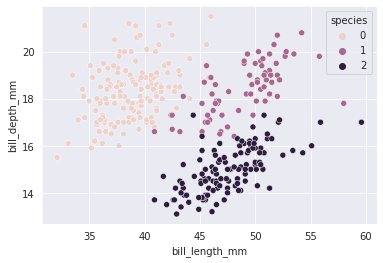

In [ ]:
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=df,hue='species')
plt.show()

In [ ]:
X = df.drop(['species'],axis=1)
y = df['species']
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=20,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(313, 6) (20, 6)
(313,) (20,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = y_train.values
X_train[:3,:]

array([[-0.89919225, -0.24168425,  0.5740843 , -0.36122883, -0.17338991,
         0.97788036],
       [ 0.51511516, -0.60712952, -0.08878432, -0.7865503 , -0.60338117,
         0.97788036],
       [-0.89919225,  0.9277406 , -1.1085822 ,  1.90715234,  1.57728882,
         0.97788036]])

In [ ]:
X_test = sc.transform(X_test)
y_test = y_test.values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
print(y_pred)

[1 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2]


In [ ]:
(y_test==y_pred).sum()

19

혼동 행렬 계산

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[8 1 0]
 [0 5 0]
 [0 0 6]]


히트맵 그리기

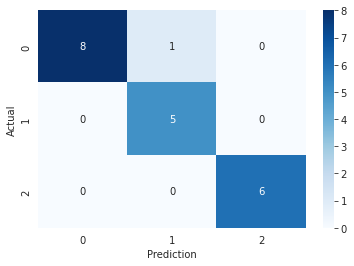

In [ ]:
import seaborn as sns
s = sns.heatmap(cf, annot=True, cmap='Blues')
s.set(xlabel='Prediction', ylabel='Actual')
plt.show()

정확도, 재현율, 정밀도

In [ ]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ',acc)
pre = precision_score(y_test, y_pred, average= "macro")
print('precision_score : ', pre)
recall = recall_score(y_test, y_pred, average= "macro")
print('recall_score: ', recall)

accuracy_score :  0.95
precision_score :  0.9444444444444445
recall_score:  0.9629629629629629


# 서포트 벡터 머신

데이터 준비

In [ ]:
from sklearn import svm, datasets
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

데이터의 형태를 데이터 프레임으로 만든다.

In [ ]:
dfX = pd.DataFrame(cancer.data, columns=cancer.feature_names)
dfy = pd.DataFrame(cancer.target, columns=['target'])
print('features :', dfX.shape)
print('label :', dfy.shape)

features : (569, 30)
label : (569, 1)


데이터 정보 표시

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.8 KB


결측치 확인

In [ ]:
df.isnull().sum(axis=0)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

테스트 데이터 준비

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy,test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455, 1) (114, 1)


데이터 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = y_train.values
X_train[:3, :]

array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
         0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
        -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
         3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
        -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
         1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
         3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
         0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
         1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
         2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
         3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483,
        -0.30735463, -0.36555756, -0.69650228,  1

테스트데이터 스케일링

In [ ]:
X_test = sc.transform(X_test)
# y_test = y_test.values

알고리즘 학습

In [ ]:
y_train = y_train.flatten()

from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

# X_test = sc.fit_transform(X_test)
# y_test = y_test.values.flatten()
y_test = y_test.values
y_test = y_test.flatten()
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

평가

accuracy_score: 0.9561
precision_score: 0.9714
recall_score: 0.9577


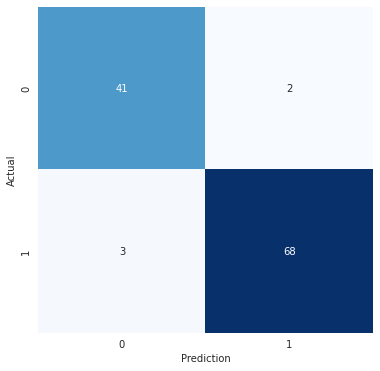

In [ ]:
# Code 평가지표를 계산한다.
from sklearn.metrics import *
def print_scores(y_true, y_pred):
  print('accuracy_score: {0:.4f}'.format(accuracy_score(y_true, y_pred)))
  print('precision_score: {0:.4f}'.format(precision_score(y_true, y_pred)))
  print('recall_score: {0:.4f}'.format(recall_score(y_true, y_pred)))
print_scores(y_test, y_pred)

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
s = sns.heatmap(cf, annot=True, fmt='d', cmap="Blues", cbar=False)
s.set(xlabel='Prediction', ylabel='Actual')
plt.show()

평가지표 계산

In [ ]:
from sklearn.metrics import *
def print_scores(y_true, y_pred):
  print('accuracy_score: {0:.4f}'.format(accuracy_score(y_true, y_pred)))
  print('precision_score: {0:.4f}'.format(precision_score(y_true, y_pred)))
  print('recall_score: {0:.4f}'.format(recall_score(y_true, y_pred)))
print_scores(y_test, y_pred)

accuracy_score: 0.9561
precision_score: 0.9714
recall_score: 0.9577


# knn 통해서 svm의 데이터 셋 문제 해결

데이터 준비

In [ ]:
from sklearn import svm, datasets
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

데이터의 형태를 데이터 프레임으로 만든다.

In [ ]:
dfX = pd.DataFrame(cancer.data, columns=cancer.feature_names)
dfy = pd.DataFrame(cancer.target, columns=['target'])
print('features :', dfX.shape)
print('label :', dfy.shape)

features : (569, 30)
label : (569, 1)


데이터 정보 표시

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.8 KB


결측치 확인

In [ ]:
df.isnull().sum(axis=0)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

테스트 데이터 준비

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy,test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455, 1) (114, 1)


데이터 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = y_train.values
X_train[:3, :]

array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
         0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
        -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
         3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
        -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
         1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
         3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
         0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
         1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
         2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
         3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483,
        -0.30735463, -0.36555756, -0.69650228,  1

테스트데이터 스케일링

In [ ]:
X_test = sc.transform(X_test)
# y_test = y_test.values

알고리즘 학습

In [ ]:
# y_train = y_train.flatten()

# from sklearn.svm import SVC
# svc = SVC(kernel="linear")
# svc.fit(X_train, y_train)

# # X_test = sc.fit_transform(X_test)
# # y_test = y_test.values.flatten()
# y_test = y_test.values
# y_test = y_test.flatten()
# y_pred = svc.predict(X_test)
# y_pred

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred = knn.predict(X_test)
print(y_pred)
# (y_test==y_pred).sum()

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [ ]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ',acc)
pre = precision_score(y_test, y_pred, average= "macro")
print('precision_score : ', pre)
recall = recall_score(y_test, y_pred, average= "macro")
print('recall_score: ', recall)

accuracy_score :  0.956140350877193
precision_score :  0.9553571428571428
recall_score:  0.9510317720275139


# 위스콘신 유방암 Classification

In [ ]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split 

## 5.분류모델구축
from sklearn.tree import DecisionTreeClassifier # 결정 트리
from sklearn.neighbors import KNeighborsClassifier # K-최근접 이웃
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델

## 5_1.앙상블 모델 구축
from sklearn.ensemble import VotingClassifier # 과반수 투표(Majority Voting) 

## 6.모델검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # 정확도, 민감도 등
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기

## 7.최적화
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝
from sklearn.model_selection import cross_val_score # 교차타당도 # 추가

In [ ]:
df1 = pd.read_csv('data.csv')
df1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df1.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df1['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
def func1(row):
    if 'M' in row:
        return 1
    else:
        return 0 
    
df1['판정'] = df1['diagnosis'].apply(func1)
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,판정
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [ ]:
total = df1.drop(columns=['id','diagnosis','Unnamed: 32'])
total.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,판정
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
X = total.drop(['판정'],axis=1)
y = total['판정']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234, stratify=y)

In [ ]:
logistic = LogisticRegression(solver='liblinear',
                              penalty='l2',
                              C=0.001,
                              random_state=1)

tree = DecisionTreeClassifier(max_depth=None,
                              criterion='entropy',
                              random_state=1)

knn = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')

voting_estimators = [('logistic', logistic), ('tree', tree), ('knn', knn)]

voting = VotingClassifier(estimators = voting_estimators,
                          voting='soft')

clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'Majority voting']

all_clf = [logistic, tree, knn, voting]

In [ ]:
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]"
          % (scores.mean(), scores.std(), label))

ROC AUC: 0.960 (+/- 0.027) [Logistic regression]
ROC AUC: 0.929 (+/- 0.043) [Decision tree]
ROC AUC: 0.895 (+/- 0.056) [KNN]
ROC AUC: 0.978 (+/- 0.019) [Majority voting]


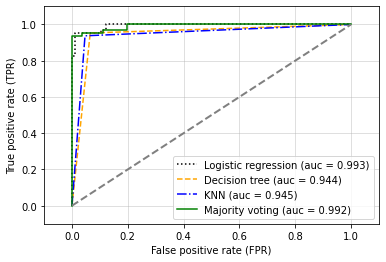

In [ ]:
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls \
        in zip(all_clf, clf_labels, colors, linestyles):

    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
tree = DecisionTreeClassifier(max_depth=None,
                              criterion='entropy',
                              random_state=1)

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=500, 
                                random_state=1)

clf_labels = ['Decision tree', 'Random forest']

all_clf = [tree, forest]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(tree)
plt.show()

In [ ]:
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]"
          % (scores.mean(), scores.std(), label))

ROC AUC: 0.929 (+/- 0.043) [Decision tree]
ROC AUC: 0.990 (+/- 0.016) [Random forest]


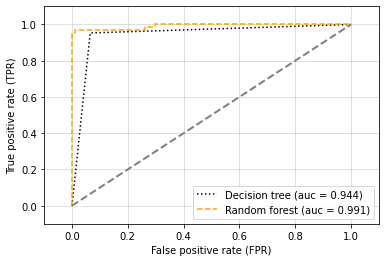

In [ ]:
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls \
        in zip(all_clf, clf_labels, colors, linestyles):

    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(max_depth=3, # 수정
                              criterion='entropy',
                              random_state=1)

adaboost = AdaBoostClassifier(base_estimator=tree, # 수정
                              n_estimators=500,
                              learning_rate = 0.1, # 수정
                              random_state=1)

clf_labels = ['Decision tree', 'Ada boost']

all_clf = [tree, adaboost]

In [ ]:
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]"
          % (scores.mean(), scores.std(), label))

ROC AUC: 0.960 (+/- 0.031) [Decision tree]
ROC AUC: 0.985 (+/- 0.015) [Ada boost]


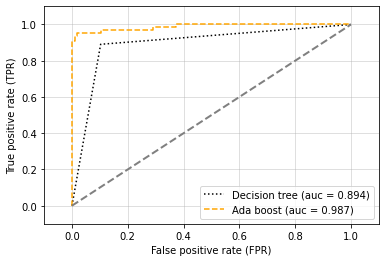

In [ ]:
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls \
        in zip(all_clf, clf_labels, colors, linestyles):

    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

# 머신러닝 분류

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

dfX = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dfY = pd.DataFrame(data=iris.target, columns=['species'])
df = pd.concat([dfX,dfY], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df = df.drop(columns = ['species'])

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.loc[df.duplicated(),:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
142,5.8,2.7,5.1,1.9


In [ ]:
df.columns = ['sepal_length','sepal_width','patal_length','petal_width']

In [ ]:
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9),:]

,sepal_length,sepal_width,patal_length,petal_width
101,5.8,2.7,5.1,1.9
142,5.8,2.7,5.1,1.9


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9),:]

,sepal_length,sepal_width,patal_length,petal_width
101,5.8,2.7,5.1,1.9


In [ ]:
df.head()

,sepal_length,sepal_width,patal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## KNN

In [ ]:
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()

dfX = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dfY = pd.DataFrame(data=iris.target, columns=['species'])
df = pd.concat([dfX,dfY], axis=1)

# X_data = df.loc[:,'sepal_length':'petal_width']
# y_data = df.loc[:,'Target']

X_train,X_test,y_train,y_test = train_test_split(dfX,dfY,test_size=0.2,
                                                 shuffle=True,random_state=20)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_knn_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

knn_acc = accuracy_score(y_test,y_knn_pred)
print("정확도:",knn_acc)

정확도: 1.0


## SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test,y_svc_pred)
print("정확도 : ", svc_acc)

정확도 :  1.0
